In [ ]:
### SVM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import datasets
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
style.use('default')

In [2]:
from sklearn.svm import SVC
clf = SVC()

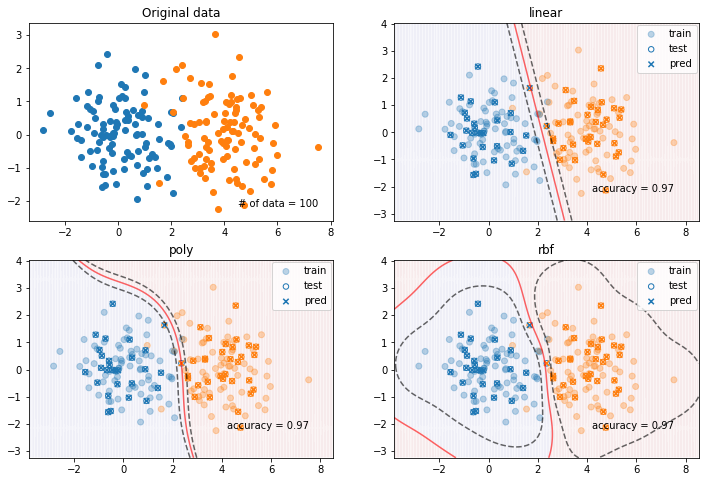

In [6]:
n = 100
x1 = np.random.normal(0,1,n)
y1 = np.random.normal(0,1,n)
x2 = np.random.normal(4,1,n)
y2 = np.random.normal(0,1,n)

import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2,2)#m행 n열 
plt.figure(figsize=(12,8))
ax = plt.subplot(gs[0,0])
ax.set_title('Original data')
ax.scatter(x1,y1)
ax.scatter(x2,y2)

x = np.array([x1,x2]).reshape(n*2,1)
y = np.array([y1,y2]).reshape(n*2,1)
X = np.append(x,y,axis=1)
Y = np.array([[0]*n,[1]*n]).reshape(n*2,)

ax.text(max(X[:,0]),min(X[:,1]),'# of data = %d'%n, ha = 'right', va = 'bottom')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)
color_map = dict()
for i in range(2):
    color_map[i] = 'C'+str(i)
    
x_min = X[:,0].min()
x_max = X[:,0].max()
y_min = X[:,1].min()
y_max = X[:,1].max()

gss = [gs[0,1],gs[1,0],gs[1,1]]
kernels = ['linear', 'poly', 'rbf']

for i in range(len(gss)):
    _gs = gss[i]
    kernel = kernels[i]
    
    clf = SVC(kernel=kernel)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    ax = plt.subplot(_gs)
    ax.set_title(kernel)
    
    XX,YY = np.mgrid[x_min-1:x_max+1:200j, y_min-1:y_max+1:200j]
    Z = clf.decision_function(np.append(XX.reshape(len(XX)**2,1),YY.reshape(len(XX)**2,1),axis=1))
    Z = Z.reshape(XX.shape)
    ax.pcolormesh(XX,YY,Z > 0, cmap = plt.cm.coolwarm, alpha = 0.02)#XX, YY부터 여기까지가 배경색칠하기 코드
    ax.contour(XX,YY,Z, colors = ['k','red','k']
              , linestyles = ['--','-','--'], levels = [-.5,0,.5], alpha = .6)
    
    
    ax.scatter(X_train[:,0],X_train[:,1], label = 'train', alpha = .3
              , c = [color_map[_x] for _x in y_train])
    ax.scatter(X_test[:,0],X_test[:,1], label = 'test', alpha = 1.
               , marker = 'o', s = 30, facecolor = 'none'#점 내부 색
               , edgecolor = [color_map[_x] for _x in y_test]
                )
    ax.scatter(X_test[:,0],X_test[:,1], label = 'pred', alpha = 1.
               , marker = 'x', s = 30
               , c = [color_map[_x] for _x in y_pred]
                )
    ax.legend(loc = 'upper right', borderaxespad=.2)
    ax.text(X[:,0].max(),X[:,1].min(),'accuracy = %.2f'%(sum(y_test == y_pred)/len(y_pred)), ha ='right', va = 'bottom')

In [7]:
XX,YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]

In [8]:
clf.decision_function(np.append(XX.reshape(len(XX)**2,1),YY.reshape(len(XX)**2,1),axis=1))#부호로 예측결과 판정

array([-0.01515415, -0.02041594, -0.0258797 , ...,  0.12230717,
        0.12088968,  0.11952641])

In [9]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [10]:
for i in set(Y):
    color_map[i] = 'C'+str(i)
color_map

{0: 'C0', 1: 'C1', 2: 'C2'}

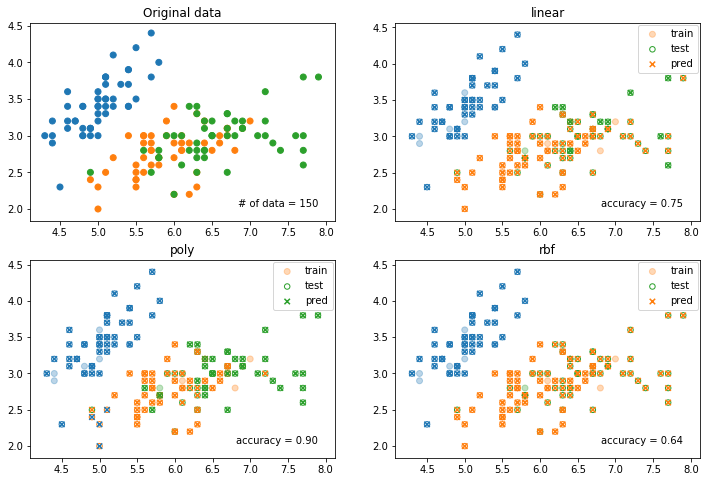

In [11]:
n = len(X)
color_map = dict()
for i in set(Y):
    color_map[i] = 'C'+str(i)

import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2,2)
plt.figure(figsize=(12,8))
ax = plt.subplot(gs[0,0])
ax.set_title('Original data')
for i in set(Y):
    tg = Y==i
    ax.scatter(X[tg,0],X[tg,1], c = [color_map[_x] for _x in Y[tg]])



ax.text(max(X[:,0]),min(X[:,1]),'# of data = %d'%n, ha = 'right', va = 'bottom')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.9)
    
x_min = X[:,0].min()
x_max = X[:,0].max()
y_min = X[:,1].min()
y_max = X[:,1].max()

gss = [gs[0,1],gs[1,0],gs[1,1]]
kernels = ['linear', 'poly', 'rbf']

for i in range(len(gss)):
    _gs = gss[i]
    kernel = kernels[i]
    
    clf = SVC(kernel=kernel)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    ax = plt.subplot(_gs)
    ax.set_title(kernel)
    
    ax.scatter(X_train[:,0],X_train[:,1], label = 'train', alpha = .3
              , c = [color_map[_x] for _x in y_train])
    ax.scatter(X_test[:,0],X_test[:,1], label = 'test', alpha = 1.
               , marker = 'o', s = 30, facecolor = 'none'
               , edgecolor = [color_map[_x] for _x in y_test]
                )
    ax.scatter(X_test[:,0],X_test[:,1], label = 'pred', alpha = 1.
               , marker = 'x', s = 30
               , c = [color_map[_x] for _x in y_pred]
                )
    ax.legend(loc = 'upper right', borderaxespad=.2)
    ax.text(X[:,0].max(),X[:,1].min(),'accuracy = %.2f'%(sum(y_test == y_pred)/len(y_pred)), ha ='right', va = 'bottom')

In [13]:
df = pd.read_csv('./train.csv', index_col=0)
df2 = pd.get_dummies(df.Sex,prefix='Sex')
df2['Pclass'] = df.Pclass
df2['SibSp'] = df.SibSp
df2['Parch'] = df.Parch
df2 = pd.concat([df2,pd.get_dummies(df.Embarked,prefix='Embarked')],axis=1)

title = pd.Series([x.split(', ')[1].split('.')[0] for x in df.Name],index=df.index)
temp = title.value_counts()
tgt = temp[temp < 3].index.values

title[[x in tgt for x in title]] = 'Etc'
df2 = pd.concat([df2,pd.get_dummies(title,prefix='Embarked')],axis=1)

X = df2.values
Y = df.Survived.values

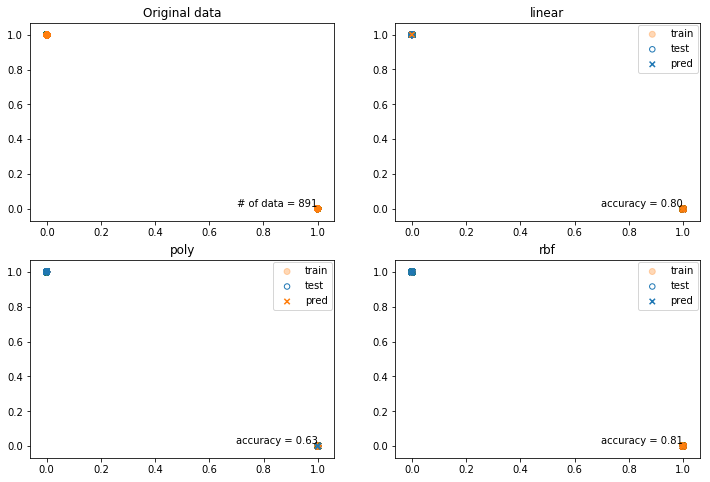

In [14]:
n = len(X)
color_map = dict()
for i in set(Y):
    color_map[i] = 'C'+str(i)

import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2,2)
plt.figure(figsize=(12,8))
ax = plt.subplot(gs[0,0])
ax.set_title('Original data')
for i in set(Y):
    tg = Y==i
    ax.scatter(X[tg,0],X[tg,1], c = [color_map[_x] for _x in Y[tg]])



ax.text(max(X[:,0]),min(X[:,1]),'# of data = %d'%n, ha = 'right', va = 'bottom')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.9)
    
x_min = X[:,0].min()
x_max = X[:,0].max()
y_min = X[:,1].min()
y_max = X[:,1].max()

gss = [gs[0,1],gs[1,0],gs[1,1]]
kernels = ['linear', 'poly', 'rbf']

#tSNE를 해보면 그림이 보기 좋을 수 있음
for i in range(len(gss)):
    _gs = gss[i]
    kernel = kernels[i]
    
    clf = SVC(kernel=kernel)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    ax = plt.subplot(_gs)
    ax.set_title(kernel)
    
    ax.scatter(X_train[:,0],X_train[:,1], label = 'train', alpha = .3
              , c = [color_map[_x] for _x in y_train])
    ax.scatter(X_test[:,0],X_test[:,1], label = 'test', alpha = 1.
               , marker = 'o', s = 30, facecolor = 'none'
               , edgecolor = [color_map[_x] for _x in y_test]
                )
    ax.scatter(X_test[:,0],X_test[:,1], label = 'pred', alpha = 1.
               , marker = 'x', s = 30
               , c = [color_map[_x] for _x in y_pred]
                )
    ax.legend(loc = 'upper right', borderaxespad=.2)
    ax.text(X[:,0].max(),X[:,1].min(),'accuracy = %.2f'%(sum(y_test == y_pred)/len(y_pred)), ha ='right', va = 'bottom')

In [2]:
### 랜덤포레스트

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import datasets
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
style.use('default')

In [4]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [5]:
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

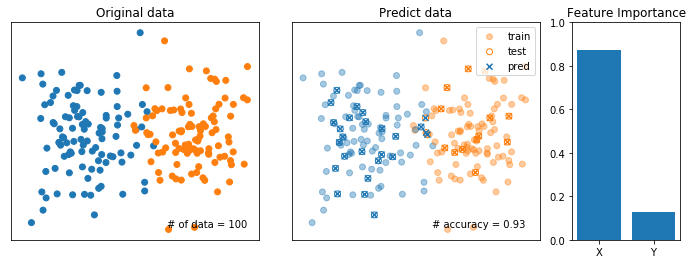

In [6]:
n = 100
x1 = np.random.normal(0,1,n)
y1 = np.random.normal(0,1,n)
x2 = np.random.normal(4,1,n)
y2 = np.random.normal(0,1,n)
x = np.array([x1,x2]).reshape(n*2,1)
y = np.array([y1,y2]).reshape(n*2,1)
X = np.append(x,y,axis=1)
Y = np.array([[0]*n,[1]*n]).reshape(n*2,)

color_map = dict()
for i in set(Y):
    color_map[i] = 'C'+str(i)
x_min = X[:,0].min()
x_max = X[:,0].max()
y_min = X[:,1].min()
y_max = X[:,1].max()

import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(1, 5,wspace=.3)

plt.figure(figsize=(12,4))
ax = plt.subplot(gs[0, :2])
ax.set_title('Original data')
ax.scatter(X[:,0],X[:,1], c = [color_map[_x] for _x in Y])
ax.text(max(x2),min(np.array([y1,y2]).reshape(n*2,)),'# of data = %d'%n, ha = 'right', va = 'bottom')
ax.set_yticks([])
ax.set_xticks([])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

ax = plt.subplot(gs[0, 2:4])
ax.set_title('Predict data')
ax.scatter(X_train[:,0],X_train[:,1], c = [color_map[_x] for _x in y_train],alpha = .4,label = 'train')
ax.scatter(X_test[:,0],X_test[:,1], edgecolor = [color_map[_x] for _x in y_test],label = 'test'
          ,facecolor = 'none')
ax.scatter(X_test[:,0],X_test[:,1], c = [color_map[_x] for _x in y_pred],label = 'pred'
          ,marker = 'x')
ax.text(max(x2),min(np.array([y1,y2]).reshape(n*2,)),'# accuracy = %.2f'%(sum(y_test == y_pred)/len(y_pred)), ha = 'right', va = 'bottom')
ax.set_yticks([])
ax.set_xticks([])
ax.legend(loc = 'upper right', borderaxespad = .5)

ax = plt.subplot(gs[0, 4])
ax.set_title('Feature Importance')
ax.bar(np.arange(2),clf.feature_importances_)
ax.set_xticks(np.arange(2))
ax.set_xticklabels(['X', 'Y'])
ax.set_ylim([0,1])

plt.show()

In [7]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

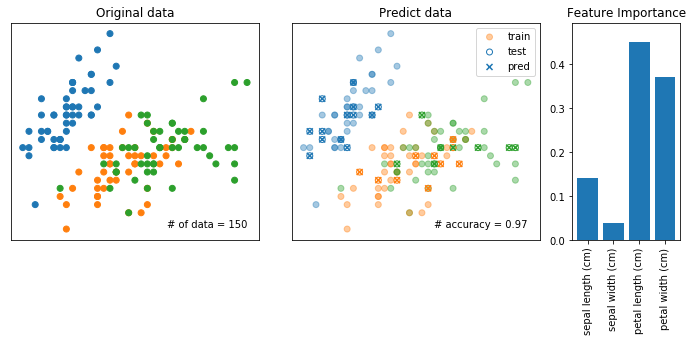

In [8]:
n = len(X)

color_map = dict()
for i in set(Y):
    color_map[i] = 'C'+str(i)
x_min = X[:,0].min()
x_max = X[:,0].max()
y_min = X[:,1].min()
y_max = X[:,1].max()

import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(1, 5,wspace=.3)

plt.figure(figsize=(12,4))
ax = plt.subplot(gs[0, :2])
ax.set_title('Original data')
ax.scatter(X[:,0],X[:,1], c = [color_map[_x] for _x in Y])
ax.text(max(X[:,0]),min(X[:,1]),'# of data = %d'%n, ha = 'right', va = 'bottom')
ax.set_yticks([])
ax.set_xticks([])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

ax = plt.subplot(gs[0, 2:4])
ax.set_title('Predict data')
ax.scatter(X_train[:,0],X_train[:,1], c = [color_map[_x] for _x in y_train],alpha = .4,label = 'train')
ax.scatter(X_test[:,0],X_test[:,1], edgecolor = [color_map[_x] for _x in y_test],label = 'test'
          ,facecolor = 'none')
ax.scatter(X_test[:,0],X_test[:,1], c = [color_map[_x] for _x in y_pred],label = 'pred'
          ,marker = 'x')
ax.text(max(X[:,0]),min(X[:,1]),'# accuracy = %.2f'%(sum(y_test == y_pred)/len(y_pred)), ha = 'right', va = 'bottom')
ax.set_yticks([])
ax.set_xticks([])
ax.legend(loc = 'upper right', borderaxespad = .5)

ax = plt.subplot(gs[0, 4])
ax.set_title('Feature Importance')
fi = clf.feature_importances_
ax.bar(np.arange(len(fi)),fi)
ax.set_xticks(np.arange(len(fi)))
ax.set_xticklabels(iris.feature_names,rotation = 90)
ax.set_ylim([0,max(fi)*1.1])

plt.show()

In [9]:
df = pd.read_csv('./train.csv', index_col=0)
df2 = pd.get_dummies(df.Sex,prefix='Sex')
df2['Pclass'] = df.Pclass
df2['SibSp'] = df.SibSp
df2['Parch'] = df.Parch
df2 = pd.concat([df2,pd.get_dummies(df.Embarked,prefix='Embarked')],axis=1)

title = pd.Series([x.split(', ')[1].split('.')[0] for x in df.Name],index=df.index)
temp = title.value_counts()
tgt = temp[temp < 3].index.values

title[[x in tgt for x in title]] = 'Etc'
df2 = pd.concat([df2,pd.get_dummies(title,prefix='Embarked')],axis=1)

X = df2.values
Y = df.Survived.values

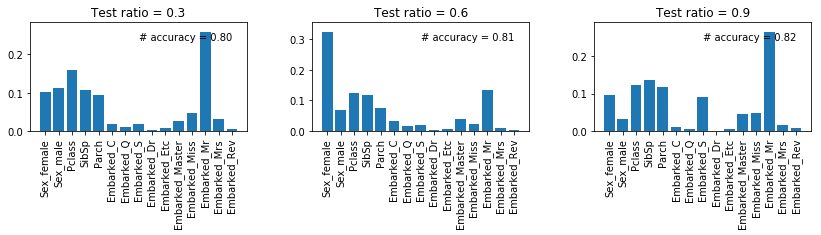

In [10]:
n = len(X)

color_map = dict()
for i in set(Y):
    color_map[i] = 'C'+str(i)
x_min = X[:,0].min()
x_max = X[:,0].max()
y_min = X[:,1].min()
y_max = X[:,1].max()

import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(1, 3,wspace=.3)

plt.figure(figsize=(14,2))
gss = [gs[0, 0],gs[0, 1],gs[0, 2]]
t_sizes =[0.3,0.6,0.9]
for i in range(len(gss)):
    _gs = gss[i]
    t_size = t_sizes[i]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=t_size)
    
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    ax = plt.subplot(_gs)
    ax.set_title('Test ratio = %.1f'%t_size)
    fi = clf.feature_importances_
    ax.bar(np.arange(len(fi)),fi)
    ax.set_xticks(np.arange(len(fi)))
    ax.set_xticklabels(df2.columns,rotation = 90)
    ax.set_ylim([0,max(fi)*1.1])
    ax.text(len(fi)-1,max(fi)*.9,'# accuracy = %.2f'%(sum(y_test == y_pred)/len(y_pred)), ha = 'right', va = 'bottom')

plt.show()

In [11]:
### 회귀

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import datasets
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
style.use('default')

In [13]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Text(0,0.5,'data')

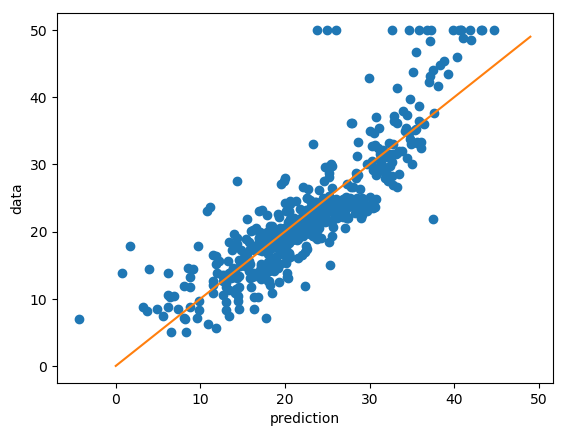

In [18]:
reg.fit(X,y)
y_pred = reg.predict(X)

plt.scatter(y_pred,y)
plt.plot(np.arange(max(y)),np.arange(max(y)),'C1')#중앙 직선
plt.xlabel('prediction')
plt.ylabel('data')

In [19]:
reg.score(X,y)

0.7406077428649428

Train score: 0.75 Test score: 0.70


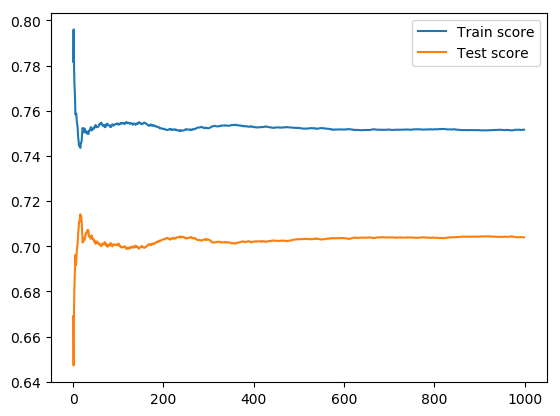

In [23]:
from sklearn.model_selection import train_test_split

n = 1000
score_tr = 0.
score_te = 0.
s_list_tr = []
s_list_te = []
for i in range(1,n+1):#데이터 분할 여러번 해서 평균내보기 > 어디로 수렴하는가
    X_tr, X_te, y_tr,y_te = train_test_split(X,y,test_size = 0.5)
    reg.fit(X_tr,y_tr)
    y_pr = reg.predict(X_te)
    score_tr += reg.score(X_tr,y_tr)
    score_te += reg.score(X_te,y_te)
    s_list_tr.append(score_tr/i)
    s_list_te.append(score_te/i)
print("Train score: %.2f"%(score_tr/n),"Test score: %.2f"%(score_te/n))
plt.figure()
plt.plot(np.arange(n),s_list_tr, label = 'Train score')
plt.plot(np.arange(n),s_list_te, label = 'Test score')
plt.legend()
plt.show()

In [24]:
from sklearn.linear_model import Ridge, Lasso

Train score: 0.66 Test score: 0.63


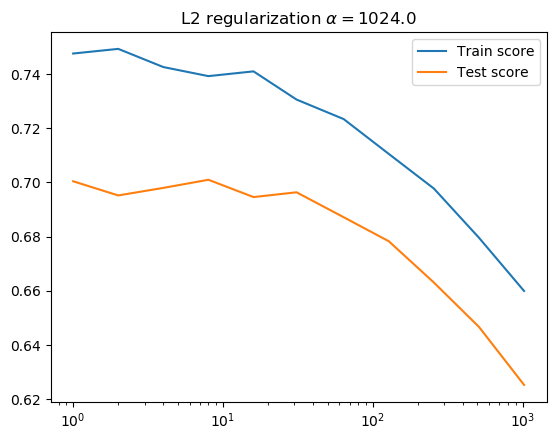

In [25]:
n = 100
s_list_tr = []
s_list_te = []
alps = [1,2,4,8,16,31,64,128,256,512,1024]
for alp in alps:

    score_tr = 0.
    score_te = 0.

    reg = Ridge(alp)
    for i in range(1,n+1):
        X_tr, X_te, y_tr,y_te = train_test_split(X,y,test_size = 0.5)
        reg.fit(X_tr,y_tr)
        y_pr = reg.predict(X_te)
        score_tr += reg.score(X_tr,y_tr)
        score_te += reg.score(X_te,y_te)
    s_list_tr.append(score_tr/i)
    s_list_te.append(score_te/i)
print("Train score: %.2f"%(score_tr/n),"Test score: %.2f"%(score_te/n))
plt.figure()
plt.title(r'L2 regularization $\alpha=%.1f$'%alp)
plt.plot(alps,s_list_tr, label = 'Train score')
plt.plot(alps,s_list_te, label = 'Test score')
plt.legend()
plt.xscale('log')
plt.show()

In [26]:
reg.coef_

array([-0.06438454,  0.0571932 , -0.01488277,  0.02489684, -0.0025124 ,
        0.34899159,  0.04654746, -0.43744736,  0.19586636, -0.01546882,
       -0.47886159,  0.0086067 , -0.76659144])

Train score: 0.63 Test score: 0.60


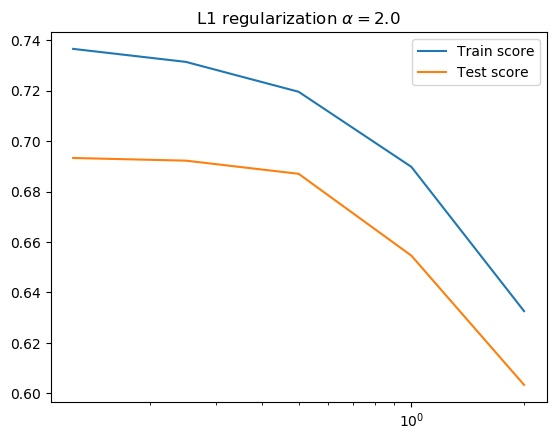

In [27]:
n = 1000
s_list_tr = []
s_list_te = []
alps = [.125,.25,.5,1,2]
for alp in alps:

    score_tr = 0.
    score_te = 0.

    reg = Lasso(alp)
    for i in range(1,n+1):
        X_tr, X_te, y_tr,y_te = train_test_split(X,y,test_size = 0.5)
        reg.fit(X_tr,y_tr)
        y_pr = reg.predict(X_te)
        score_tr += reg.score(X_tr,y_tr)
        score_te += reg.score(X_te,y_te)
    s_list_tr.append(score_tr/i)
    s_list_te.append(score_te/i)
print("Train score: %.2f"%(score_tr/n),"Test score: %.2f"%(score_te/n))
plt.figure()
plt.title(r'L1 regularization $\alpha=%.1f$'%alp)
plt.plot(alps,s_list_tr, label = 'Train score')
plt.plot(alps,s_list_te, label = 'Test score')
plt.legend()
plt.xscale('log')
plt.show()

In [31]:
reg.coef_ #0이 아닌게 사용한 변수 겟수
#sum(reg.coef_ !=0)

8

Train score: 0.63 Test score: 0.61


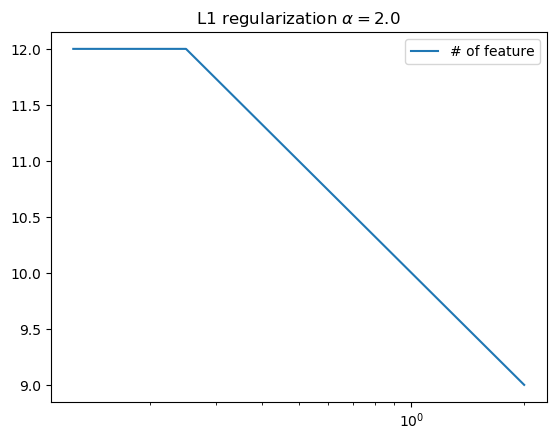

In [32]:
#알파 증가에 따라 사용하는 변수 갯수 작아짐
n = 1
s_list_tr = []
s_list_te = []
alps = [.125,.25,.5,1,2]
for alp in alps:

    score_tr = 0.
    score_te = 0.

    reg = Lasso(alp)
    for i in range(1,n+1):
        X_tr, X_te, y_tr,y_te = train_test_split(X,y,test_size = 0.5)
        reg.fit(X_tr,y_tr)
        y_pr = reg.predict(X_te)
        score_tr += reg.score(X_tr,y_tr)
        score_te += reg.score(X_te,y_te)
    s_list_tr.append(sum(reg.coef_ != 0.))
    s_list_te.append(score_te/i)
print("Train score: %.2f"%(score_tr/n),"Test score: %.2f"%(score_te/n))
plt.figure()
plt.title(r'L1 regularization $\alpha=%.1f$'%alp)
plt.plot(alps,np.array(s_list_tr), label = '# of feature')
# plt.plot(alps,s_list_te, label = 'Test score')
plt.legend()
plt.xscale('log')
plt.show()

In [33]:
### SVR

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import datasets
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
style.use('default')

In [35]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

In [39]:
from sklearn.svm import SVR
from sklearn.preprocessing import minmax_scale
reg = SVR()

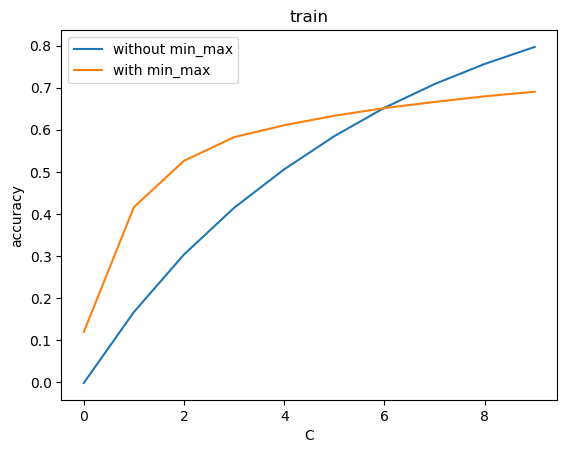

In [48]:
X = boston.data
x = []
for _c in range(0,10):
    reg = SVR(C= _c+0.1)
    reg.fit(X,y)
    sc = reg.score(X,y)
    x.append(sc)

X = minmax_scale(boston.data)
x2 = []
for _c in range(0,10):
    reg = SVR(C= _c+0.1)
    reg.fit(X,y)
    sc = reg.score(X,y)
    x2.append(sc)

plt.figure()
plt.title("train")
plt.plot(x, label = "without min_max")
plt.plot(x2, label = "with min_max")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend()
plt.show()

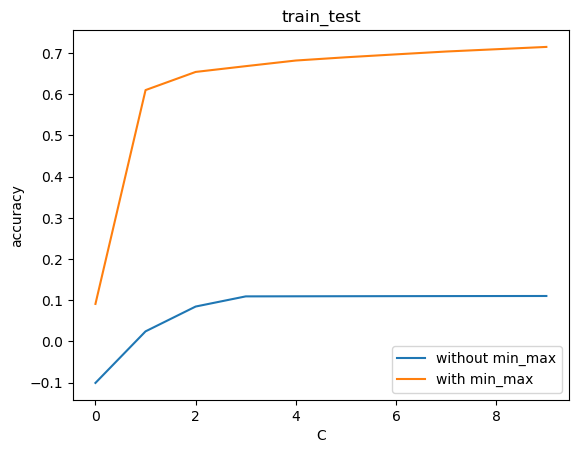

In [51]:
from sklearn.model_selection import train_test_split

X = boston.data
x = []
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.3)
for _c in range(0,100,10):
    reg = SVR(C= _c+0.1)
    reg.fit(X_tr,y_tr)
    sc = reg.score(X_te,y_te)
    x.append(sc)


X = minmax_scale(boston.data)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.3)
x2 = []
for _c in range(0,100,10):
    reg = SVR(C= _c+0.1)
    reg.fit(X_tr,y_tr)
    sc = reg.score(X_te,y_te)
    x2.append(sc)

plt.figure()
plt.title("train_test")
plt.plot(x, label = "without min_max")
plt.plot(x2, label = "with min_max")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [55]:
from sklearn.model_selection import train_test_split

X = minmax_scale(boston.data)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.3)
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
x2 = []
for ker in kernels:
    reg = SVR(ker, C= 4, degree=2)#degree : n차항
    reg.fit(X_tr,y_tr)
    sc = reg.score(X_te,y_te)
    x2.append(sc)
    print(ker, " : ", sc)

linear  :  0.6418315508103904
poly  :  0.29657426852152413
rbf  :  0.5111624076856389
sigmoid  :  0.4112591317611449


In [53]:
?reg

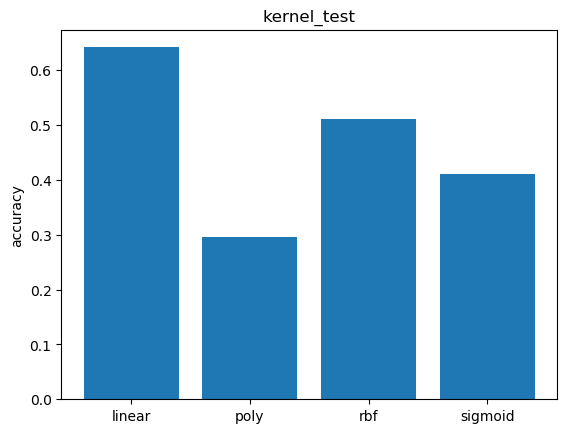

In [60]:
plt.figure()
plt.title("kernel_test")
plt.bar(np.arange(len(kernels)),x2)
plt.xticks(np.arange(len(kernels)),kernels)
plt.ylabel("accuracy")
plt.show()

In [61]:
np.arange(len(kernels))

array([0, 1, 2, 3])

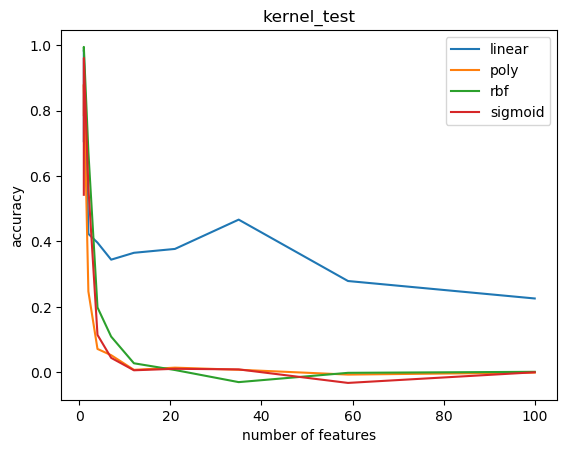

In [68]:
from sklearn.model_selection import train_test_split

nfs = np.logspace(0, 2, 10).astype("int")
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
plt.figure()
plt.title("kernel_test")
for ker in kernels:
    reg = SVR(ker, C= 4, degree=2)#degree : n차항
    x2 = []
    for n in nfs:
        X, y = datasets.make_regression(500,n)
        X = minmax_scale(X)
        X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.3)
        reg.fit(X_tr,y_tr)
        sc = reg.score(X_te,y_te)
        x2.append(sc)
    plt.plot(nfs,x2, label= ker)
plt.xlabel("number of features")
plt.ylabel("accuracy")
plt.legend()
plt.show()